## Quiz Evaluasi Materi Basic Python Programming

In [203]:
# Python version check
import platform
print(platform.python_version())

3.6.4


### Library

In [204]:
import pandas as pd
import numpy as np

### Dataset

**Original data source** : https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

**Summary**  
Dataset contains daily count of rental bikes between years 2011 in Capital bikeshare system with the corresponding weather and seasonal information, provided in two separated table (bike and weather).Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.User is able to easily rent a bike from a particular position and return back at another position.

**Dictionary 'weather'**  
datetime = date (format dd-mm-yy)  
season = musim (Spring, Summer, Fall, Winter)  
weather = cuaca (Clear, Cloudy, Light Snow)  
temp = temperature, degC  
hum = humidity, %  
windspeed = kecepatan angin, km/h  

**Dictionary 'bike'**  
datetime = date (format dd-mm-yy)  
casual = banyaknya bikesharing casual-user (non-member)  
registered = banyaknya bikesharing casual-user (member)

### Data Import & Quicklook

In [205]:
bike = pd.read_csv("Quiz/bike.csv")
weather = pd.read_csv("Quiz/weather.csv")

In [206]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
date          365 non-null object
casual        365 non-null int64
registered    365 non-null int64
dtypes: int64(2), object(1)
memory usage: 8.6+ KB


In [207]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
date         365 non-null object
season       365 non-null object
weather      365 non-null object
temp         365 non-null float64
hum          365 non-null float64
windspeed    365 non-null float64
dtypes: float64(3), object(3)
memory usage: 17.2+ KB


In [208]:
bike.head(3)

,date,casual,registered
0,01-01-11,331,654
1,02-01-11,131,670
2,03-01-11,120,1229


In [209]:
weather.head(3)

,date,season,weather,temp,hum,windspeed
0,01-01-11,Spring,Cloudy,34.4167,80.5833,10.749882
1,02-01-11,Spring,Cloudy,36.3478,69.6087,16.652113
2,03-01-11,Spring,Clear,19.6364,43.7273,16.636703


## Part 1

1.Tambahkan 1 kolom baru pada tabel 'bike' dengan nama kolom 'total', berisi jumlah casual-user dan registered-user

In [210]:
# Answer 1
bike['total'] = bike['casual'] + bike['registered']
bike.head(3)

,date,casual,registered,total
0,01-01-11,331,654,985
1,02-01-11,131,670,801
2,03-01-11,120,1229,1349


2.Tambahkan 1 kolom baru pada tabel 'weather' dengan nama kolom 'day' yang berisi nama hari berdasarkan tanggal pada kolom 'date'. Clue: Cara seperti exercise data 'pet' pada materi Python Programming 2 

In [211]:
# Answer 2
weather['date'] = pd.to_datetime(weather['date'])
weather['day'] = weather['date'].dt.weekday_name
weather.head(3)

,date,season,weather,temp,hum,windspeed,day
0,2011-01-01,Spring,Cloudy,34.4167,80.5833,10.749882,Saturday
1,2011-02-01,Spring,Cloudy,36.3478,69.6087,16.652113,Tuesday
2,2011-03-01,Spring,Clear,19.6364,43.7273,16.636703,Tuesday


3.Lakukan konversi unit temperature dari degC menjadi degF. Gunakan fungsi lambda

In [212]:
# Answer 3
weather['temp'] = list(map(lambda x: ((9/5) * x) + 32, weather['temp']))
weather.head(3)

,date,season,weather,temp,hum,windspeed,day
0,2011-01-01,Spring,Cloudy,93.95006,80.5833,10.749882,Saturday
1,2011-02-01,Spring,Cloudy,97.42604,69.6087,16.652113,Tuesday
2,2011-03-01,Spring,Clear,67.34552,43.7273,16.636703,Tuesday


4.Gabungkan data 'weather' dan data 'bike' berdasar tanggal yang bersesuaian

In [213]:
# Answer 4
# convert jadi format datetime
bike['date'] = pd.to_datetime(bike['date'])
gabung_df = pd.merge(weather,bike,how='outer',on='date')
# gabung_df.head(3)
gabung_df.shape

(365, 10)

5.Pada musim dan cuaca apa bikesharing a)Paling banyak digunakan, b)Paling sedikit digunakan

In [214]:
# Answer 5
bikesharing = gabung_df[['date', 'season', 'weather', 'total']]
jumlah_bikesharing = bikesharing.groupby(['season', 'weather']).sum()
jumlah_bikesharing.sort_values(['total'], ascending=False)

total
season weather           
Fall   Clear       309150
Summer Clear       220323
Winter Clear       206059
Summer Cloudy      124513
Winter Cloudy      105123
Fall   Cloudy      103952
Spring Clear        99535
       Cloudy       49336
Winter Light Snow   14955
Fall   Light Snow    6548
Summer Light Snow    2480
Spring Light Snow    1129

1. Bikesharing paling banyak digunakan pada musim gugur ketika cuaca cerah sebanyak 309.150 pengguna
2. Bikesharing paling dikit digunakan pada musim semi ketika cuaca bersalju ringan sebanyak 309.150 pengguna

6.Tampilkan informasi nilai maximum dan nilai minimum dari variable 'temp', 'hum' dan 'winspeed' untuk setiap kategori musim

In [215]:
# Answer 6
var_musim = gabung_df[['season', 'temp', 'hum', 'windspeed']]
var_musim.describe()

,temp,hum,windspeed
count,365.000000,365.000000,365.000000
mean,119.599691,64.366477,12.823977
std,34.127199,14.874398,5.151637
min,42.643472,0.000000,1.500244
25%,90.500000,53.833300,9.084061
50%,118.250060,64.750000,12.522300
75%,150.200060,74.208300,15.750025
max,184.850060,97.250000,34.000021


**Dari tabel diatas dapat dilihat bahwa:**
    1. Untuk temperatur paling rendah adalah 42,64 degF dan yang paling tingi adalah 184,85 degF
    2. Untuk kelembapan paling rendah adalah 0 dan yang paling tingi adalah 97,25
    3. Untuk kecepatan angin paling rendah adalah 1,5 dan yang paling tingi adalah 34,0

7.Buat plot untuk memvisualisasikan hubungan antara temp (unit degF) dengan total pengguna bikesharing. Customize plot dengan ukuran, judul, pilihan warna, label yang sesuai agar lebih informatif. 

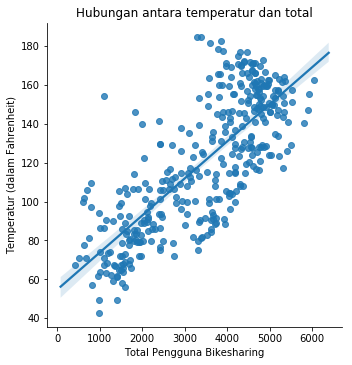

In [216]:
# Answer 7
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='total', y = 'temp', data = gabung_df, palette = 'Blues')
plt.title('Hubungan antara temperatur dan total')
plt.axis('tight')
plt.xlabel('Total Pengguna Bikesharing')
plt.ylabel('Temperatur (dalam Fahrenheit)')
plt.figure(figsize=(20,10))
plt.show()

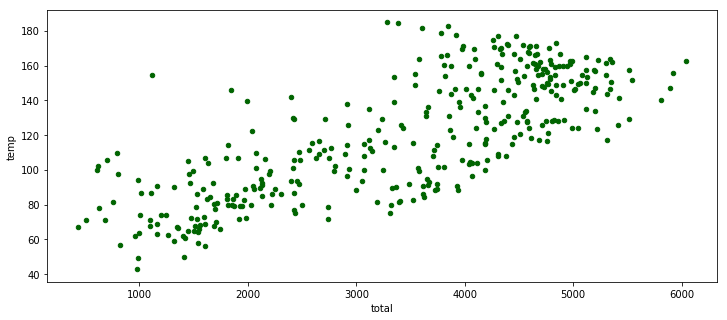

In [229]:
gabung_df.plot.scatter(x='total', y='temp', figsize=(12,5), color='DarkGreen')#menampilkan C dengan perbedaan warna

8.Tampilkan dengan grafik (barplot) jumlah pengguna bikesharing untuk setiap kategori musim. Urutkan dari kiri ke kanan mulai dari frekuensi tertinggi.

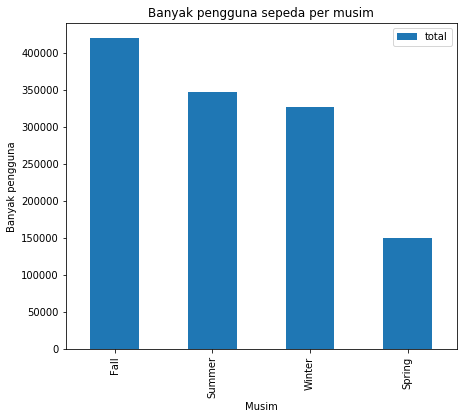

In [217]:
# Answer 8
# [answer]
pengguna_musim = gabung_df[['season', 'total']].groupby(['season']).sum()
pengguna_musim = pengguna_musim.sort_values(['total'], ascending=False)
pengguna_musim.plot.bar(figsize=(7,6))
plt.title("Banyak pengguna sepeda per musim")
plt.ylabel("Banyak pengguna")
plt.xlabel("Musim")
plt.show()

9.Cara untuk menampilkan histogram dari data pandas menggunakan matplotlib adalah 
  
a.	plt.histogram(x,bins = 15)  
b.	plt.bucket(x,bins = 15)  
c.	plt.hist(x,bins = 15)  
d.	plt.bar(x,bins = 15)  
e.	plt.his(x,bins = 15)  


In [218]:
# Answer 9
# [answer]
# Jawabannya adalah C

10.Cara untuk menampilkan scatterplot dan garis regresi menggunakan seaborn adalah  
  
a.	sns.regression  
b.	sns.lmplot  
c.	sns.linearregression  
d.	sns.scatterplot  
e.	sns.lmreg  


In [219]:
# Answer 10
# [answer]
# Jawabannya adalah B

11.Kota tempat tinggal pemain sepak bola merupakan tipe variable  
  
a.	Rating  
b.	Ratio  
c.	Nominal  
d.	Continuous  
e.	Ordinal


In [220]:
# Answer 11
# [answer]
# Jawabannya adalah C

12.Untuk menempatkan label atau tulisan atau tanda panah dalam visualisasi dapat menggunakan method  
  
a.	Legend  
b.	Arrow  
c.	Label  
d.	Text  
e.	Annotate


In [221]:
# Answer 12
# [answer]
# Jawabannya adalah E

13.Yang termasuk dalam style yang dapat digunakan dalam matplotlib  
  
a.	gplot  
b.	blackandwhite  
c.	sephia  
d.	gray  
e.	ggplot  


In [222]:
# Answer 13
# [answer]
# Jawabannya adalah E

## Part 2

1.Jelaskan perbedaan dari exploratory dan explanatory dari sisi visualisasi

**1. Exploratory Visualisasi :** Exploratory adalah proses visualiasi yang bertujuan untuk mengeksplorasi data dan megetahui informasi-informasi maupun insight dari data yang sudah ada. Hal ini dilakukan sebelum memasuki proses selanjutnya yang akan membantu para data scientist memahami apa isi datanya.

**2. Explanatory Visualisasi :** Explanatory adalah proses visualisasi yang bertujuan untuk menjelaskan kepada orang lain tentang hal-hal apa saja yang patut disoroti. Nantinya hasil visualisasi ini dapat digunakan oleh user/manajemen untuk media menentukan keputusan (decision support).

2.Jelaskan factor apa saja yang perlu dipertimbangkan dalam memilih visualisasi atau plot apa yang ingin ditampilkan dalam tahap exploration

1. Tipe data dari atribut (nominal/ordinal/ratio/interval)
2. Domain dari atribut (dapat dilihat pada dictionary data)
3. Berapa banyak data yang akan ditampilkan
4. Hubungan-hubungan atribut secara logis

3.Buat 1 grafik Time series yang menampilkan banyaknya pengguna bikesharing dari 1-Jan-2011 sampai 31-Des-2011. Ingin diketahui juga komposisi banyaknya casual-user dan registered user. Clue: 1)Gunakan data 'casual' dan 'registered', bukan data 'total. 2)Opsi menggunakan area plot

In [223]:
# answer 3
# Timeseries chart
import matplotlib.dates as mdates
gabung_df['date'] = pd.to_datetime(gabung_df['date'], format = '%d/%m/%Y')
gabung_df.set_index('date', inplace=True)

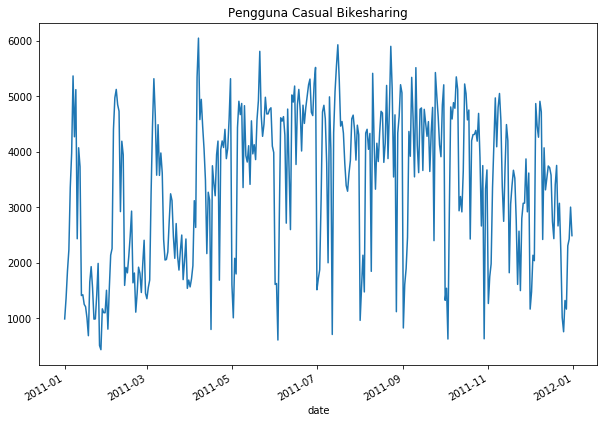

In [224]:
gabung_df['total'].plot(title='Pengguna Casual Bikesharing', figsize=(10,7))

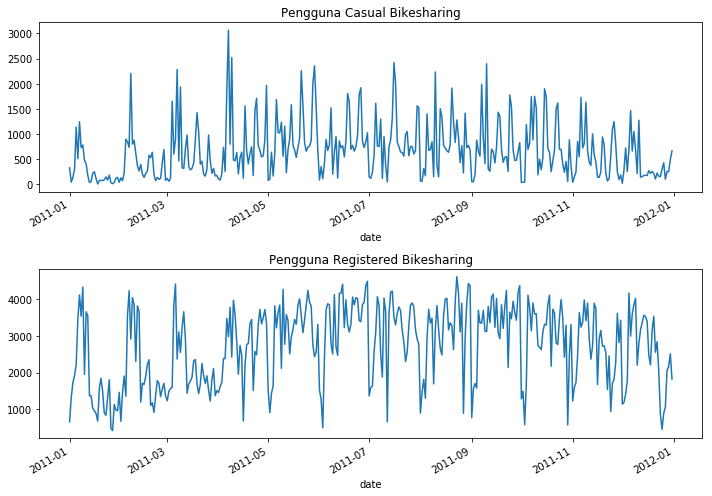

In [225]:
plt.subplot(2,1,1)
gabung_df['casual'].plot(title='Pengguna Casual Bikesharing', figsize=(10,7))
plt.subplot(2,1,2)
gabung_df['registered'].plot(title='Pengguna Registered Bikesharing', figsize=(10,7))

plt.tight_layout()
plt.show()

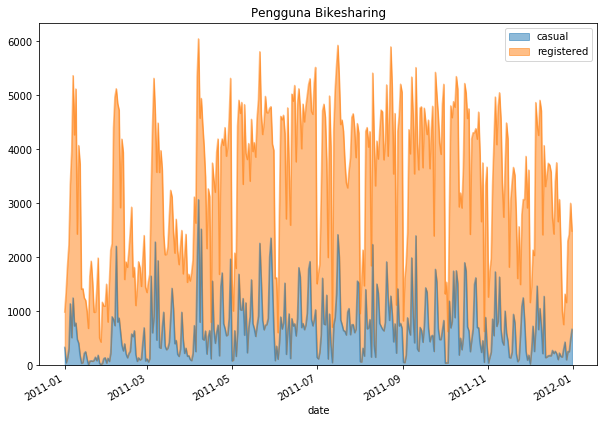

In [226]:
# Area chart
gabung_df[['casual','registered']].plot.area(title='Pengguna Bikesharing', alpha=0.5, figsize=(10,7))